<a href="https://colab.research.google.com/github/jescandagire/Chat-Application/blob/master/GIZ_Video_One%2C_Assessment_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Access Open Voice Training Data: The Mozilla’s Common Voice Platform

**Assessment Two**

### Introduction
In this notebook, we shall use a pre-trained [DeepSpeech](https://deepspeech.readthedocs.io/en/latest/) model, DeepSpeech is an open speech-to-text engine. The model used in this notebook was trained on American English and it achieves an 5.97% word error rate on the [LibriSpeech clean test corpus](http://www.openslr.org/12), a benchmark dataset used to test speech models.

---


Note that the model currently performs best in low-noise environments with clear recordings and has a bias towards US male accents. This does not mean the model cannot be used outside of these conditions, but that accuracy may be lower. In exercise, you will investigate how well the model performs on speech in your english accent.

Steps:
1. Configure the notebook.
2. Record the provided statement.
3. Upload the sentence to the notebook.
4. Transcribe the sentence.

### 1. Notebook Configuration
In this secion, we shall install the model and configure it for use as the `transcriber` function, that will be called to transcribe the sentence that you will be provided with.


---
<a name="configuration-step"></a>The `transcriber` function, takes an argument the path to the`.mp3` that you will have uploaded. i.e. `transcriber(file_path)` and prints out the text of the sentence.


---


<font color="red">**NOTE: Ensure to run the cell below.**</font>



In [ ]:
#@title [IMPORTANT] CLICK PLAY ICON TO CONFIGURE NOTEBOOK. {display-mode: "form"}
%%capture
# 1. Install the deepspeech library
!pip install deepspeech;

# 2. Download the English (en-US) pre-trained DeepSpeech model.
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.8.0/deepspeech-0.8.0-models.pbmm;
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.8.0/deepspeech-0.8.0-models.scorer;

# 3. Import the deepspeech module, and necessary modules
import deepspeech
import wave
import numpy as np

# 4. Initialize the model with the pretrained weights and the scorer.
model_file_path = 'deepspeech-0.8.0-models.pbmm'
scorer_file_path = 'deepspeech-0.8.0-models.scorer'
model = deepspeech.Model(model_file_path)

# Scorer initialization
model.enableExternalScorer(scorer_file_path)

# transcription function
def transcriber(filepath):
  """
    This function transcribes the input sentence from voice to text.

    filepath <string> path/to/custom_sentence
  """
  w = wave.open(filepath, 'r')
  rate = w.getframerate()
  frames = w.getnframes()
  buffer = w.readframes(frames)

  # DeepSpeech expects a 16-bit integer array, but the wave library returns a byte
  # array, we use numpy to convert it to the 16-bit format.

  data = np.frombuffer(buffer, dtype=np.int16)

  # Transcribe
  text = model.stt(data)

  if text:
    print(text)
  else:
    print('Unable to transcribe sentence')

### 2. Record the provided sentence.
For the assessment, we shall record this sentence: <br>

**Hi, What is your name?** <br>

After recording, the voice file will be uploaded to this notebook for transcription.<br>

To record the sentence;
1. You will need to download and install the [Audacity Tool](https://www.audacityteam.org/)

2. When the program has successfully installed, open the program.

3. Click on the record button &#9210;.<br>
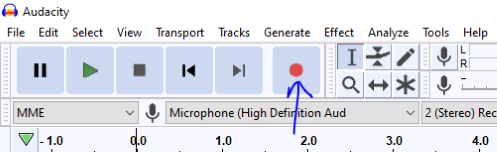

4. Proceed to record your sentence(s), when done, click the stop &#9209; button.<br>
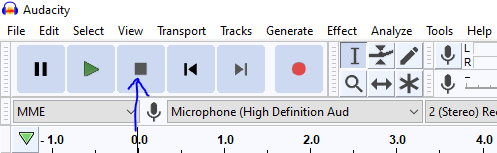

5. To save the recording, go to the file tab, then export the file in the preferred format `.wav`.<br>
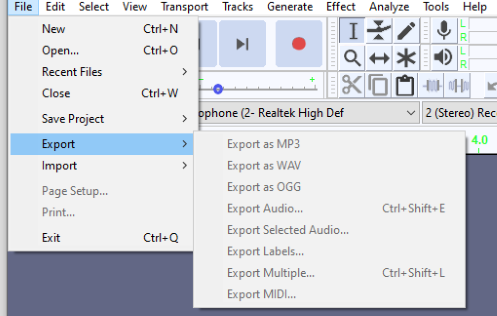


### 3. Upload the recorded sentence to this notebook.
To upload the `.wav` file: <br>
1. Click on the folder icon Annotation 2020-08-12 141640.png on the left side of this notebook, this opens up a collapsible window showing the files in the current directory.
2. Then click on the upload icon Annotation 2020-08-12 142243.png, and upload the `.wav` file that you recorded.
3. The file should now appear in the file list as shown below. _(In this case, it is the file named `test-sentence.wav`)_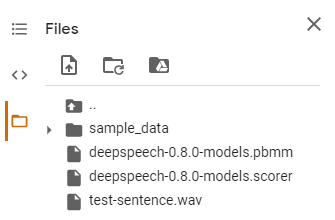

### 4. Transcribe the recorded sentence.
With the voice file uploaded, we can now run it through the model for the transcription, transcription means translating your recorded statement from voice to text. For this process, we shall use the pre-trained model through the `transcriber` function, that was defined in the configuration step [here](#configuration-step).

---

- We shall set the path to the file.
- Then run the model through the `transcriber` function.

In [9]:
# Set the filepath; change 'test-sentence.wav' to the filename that you uploaded.
file_path = 'test-sentence.wav'

In [10]:
# Run the model through the trancriber function.
transcriber(file_path)

Unable to transcribe sentence


The cell above will display the text of the sentence that you recorded, if successful. Otherwise, it will display `Unable to transcribe sentence`. 
In that case, redo the sentence recording, and ensure;
- That you speak as clearly as possible.
- Minimize the background noise as much as possible.